In [1]:
from sklearn import preprocessing,datasets
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler,binarize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
from sklearn.neighbors import KNeighborsClassifier


In [82]:
data = pd.read_csv('dataset.csv')
data.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
data.shape

(4424, 35)

In [4]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
data_isnull = data.apply(lambda x: x.isnull().sum(), axis = 0)
data_isnull

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [7]:
data_isnull.sum()

0

In [8]:
data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [9]:
#distribución de los datos
data['Target'].value_counts()/(data.shape[0])*100

Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: Target, dtype: float64

In [10]:
#unificación de graduados con matriculados.
data['Target'] = data['Target'].replace({'Graduate': 'Enrolled'})
data.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Enrolled
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Enrolled
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Enrolled


In [11]:
#nueva distribución
data['Target'].value_counts()/(data.shape[0])*100

Enrolled    67.879747
Dropout     32.120253
Name: Target, dtype: float64

In [13]:
data.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Enrolled
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Enrolled
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Enrolled


In [14]:
data['Target'].unique()

array(['Dropout', 'Enrolled'], dtype=object)

In [15]:
#conversión de varible target en dummies
data['Target'] = data['Target'].map({'Enrolled': 0, 'Dropout': 1})

In [16]:
data['Target'].head(5)

0    1
1    0
2    1
3    0
4    0
Name: Target, dtype: int64

In [17]:
#orden de datos según correlación con otras variables
data.corr()['Target'].sort_values(ascending = False)


Target                                            1.000000
Age at enrollment                                 0.254215
Debtor                                            0.229407
Gender                                            0.203983
Application mode                                  0.188908
Marital status                                    0.093712
Previous qualification                            0.091590
Curricular units 2nd sem (without evaluations)    0.079901
Mother's qualification                            0.059499
Curricular units 1st sem (without evaluations)    0.054230
Inflation rate                                    0.027826
Father's qualification                            0.016267
Unemployment rate                                 0.012980
Educational special needs                         0.002806
Course                                           -0.000083
Nacionality                                      -0.001571
International                                    -0.0103

In [18]:
print(len(list(data.columns)))
list(data.columns)

35


['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP',
 'Target']

In [19]:
data_cols_st = ['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

print(len(list(data_cols_st)))

27


In [20]:
scaler = StandardScaler()

X = data[data_cols_st]
X_scaled=scaler.fit_transform(X) # X_scaled son los datos transformados

In [83]:
# features escaladas
X_scaled_df = pd.DataFrame(X_scaled, index = data.index, columns = data_cols_st)
X_scaled_df.head(1)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.294829,0.210069,2.490896,-1.823744,0.350082,-0.386404,-0.145586,0.075111,-0.584526,-0.329669,...,-0.199273,-0.282442,-2.838337,-2.04263,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761


In [22]:
data_cols_dummies =  ['Displaced','Educational special needs', 'Debtor', 'Tuition fees up to date','Gender', 'Scholarship holder','Daytime/evening attendance','Educational special needs','International', 'Target']

In [23]:
X_dummies = data[data_cols_dummies] 

In [24]:
#concatenado de datos escalados
data = pd.concat([X_scaled_df, X_dummies], axis = 1)
data.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Daytime/evening attendance,Educational special needs,International,Target
0,-0.294829,0.210069,2.490896,-1.823744,0.350082,-0.386404,-0.145586,0.075111,-0.584526,-0.329669,...,1,0,0,1,1,0,1,0,0,1
1,-0.294829,-0.167406,-0.554068,0.254153,0.350082,-0.386404,-0.145586,-1.254495,-1.218380,-0.829997,...,1,0,0,0,1,0,1,0,0,0
2,-0.294829,-1.111094,2.490896,-1.131112,0.350082,-0.386404,-0.145586,1.072315,0.954834,0.670987,...,1,0,0,0,1,0,1,0,0,1
3,-0.294829,0.210069,0.207173,1.177663,0.350082,-0.386404,-0.145586,1.183116,0.954834,-0.329669,...,1,0,0,1,0,0,1,0,0,0
4,1.356212,0.965018,-0.554068,-1.592866,-2.856470,-0.386404,-0.145586,1.072315,1.045384,0.670987,...,0,0,0,1,0,0,0,0,0,0


In [25]:
data['Target'].value_counts()

0    3003
1    1421
Name: Target, dtype: int64

In [26]:
X = data.drop(['Target'], axis =1)
y = data['Target']

In [27]:
print('Total por labels: \n', y.groupby(y).count())

Total por labels: 
 Target
0    3003
1    1421
Name: Target, dtype: int64


Modelo GAUSSIANNB - Modelo Baseline

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(X, y, test_size = 0.30, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train_gnb, y_train_gnb)

GaussianNB()

In [30]:
y_pred_gnb = gnb.predict(X_test_gnb)
y_pred_gnb

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [31]:
#Accuracy en train
accuracy_score(y_train_gnb, gnb.predict(X_train_gnb).round(2))

0.8168604651162791

In [32]:
round(accuracy_score(y_test_gnb, y_pred_gnb), 3)

0.819

In [33]:
scores_gnb = cross_val_score(gnb, X_train_gnb, y_train_gnb, cv=10)
print(scores_gnb.mean().round(2))


0.81


In [34]:
conf_mat = confusion_matrix(y_test_gnb, y_pred_gnb)
print('Confusion matrix\n\n', conf_mat)

Confusion matrix

 [[767 120]
 [120 321]]


In [35]:
#paleta colores
cmap = sns.color_palette("Greens_d", as_cmap=True)
vmin, vmax = 0, 600

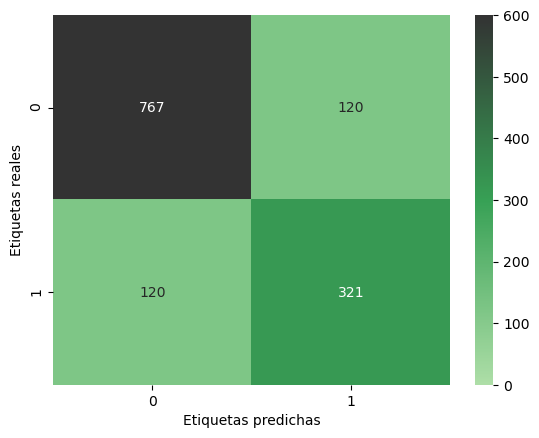

In [36]:
sns.heatmap(confusion_matrix(y_test_gnb, y_pred_gnb), annot=True, fmt='.0f',cmap=cmap, vmin=vmin, vmax=vmax)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [37]:
print(recall_score(y_test_gnb, y_pred_gnb).round(3))

0.728


In [38]:
print('Accuracy del modelo GausssianNB =', accuracy_score(y_test_gnb, y_pred_gnb).round(2))
print('Recall del modelo GausssianNB =', recall_score(y_test_gnb, y_pred_gnb).round(2))

Accuracy del modelo GausssianNB = 0.82
Recall del modelo GausssianNB = 0.73


Modelo KNN

In [39]:
# knn = KNeighborsClassifier()

In [40]:
# Definimos la estrategia de validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=12)

scores_para_df = []

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size = 0.30, random_state=42)

for i in range(1, 21):
    
    # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(knn, X_train_knn, y_train_knn, cv=kf)
    # cv_scores = cross_val_score(knn, X_train_gnb, y_train_gnb, cv=kf)
    
    # Para cada valor de n_neighbours, creamos un diccionario con el valor
    # de n_neighbours y la media y el desvío de los scores
    dict_row_score = {'score_medio': np.mean(cv_scores),
                      'score_std': np.std(cv_scores),
                      'n_neighbors': i}
    
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [41]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_df)
df_scores


,score_medio,score_std,n_neighbors
0,0.796186,0.012648,1
1,0.806849,0.009361,2
2,0.816213,0.015221,3
3,0.815893,0.012491,4
4,0.817506,0.017644,5
5,0.812020,0.014401,6
6,0.818155,0.012588,7
7,0.817187,0.014013,8
8,0.819124,0.017190,9
9,0.816863,0.011772,10


In [42]:
# Generamos los límites inferior y superior
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
df_scores.head()

,score_medio,score_std,n_neighbors,limite_inferior,limite_superior
0,0.796186,0.012648,1,0.783538,0.808835
1,0.806849,0.009361,2,0.797488,0.816210
2,0.816213,0.015221,3,0.800992,0.831434
3,0.815893,0.012491,4,0.803402,0.828384
4,0.817506,0.017644,5,0.799862,0.835150


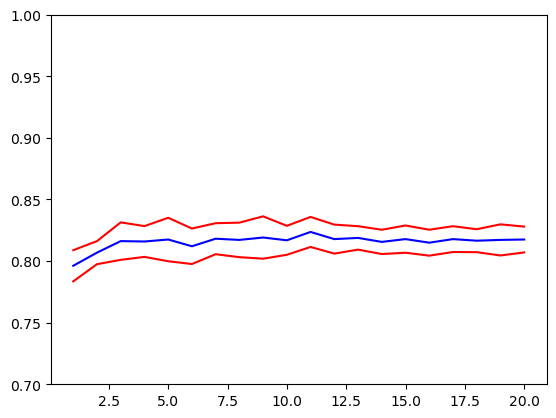

In [43]:
# Graficamos los resultados
plt.plot(df_scores['n_neighbors'], df_scores['limite_inferior'], color = 'r')
plt.plot(df_scores['n_neighbors'], df_scores['score_medio'], color = 'b')
plt.plot(df_scores['n_neighbors'], df_scores['limite_superior'], color = 'r')
plt.ylim(0.7, 1);

In [44]:
# Identificamos el score máximo
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]


,score_medio,score_std,n_neighbors,limite_inferior,limite_superior
10,0.823647,0.012181,11,0.811465,0.835828


In [45]:
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(), 'n_neighbors'].values[0]
best_k

11

In [46]:
# Elegimos el modelo óptimo de acuerdo a las pruebas de cross validation
model = KNeighborsClassifier(n_neighbors=best_k)

# Generamos los datasets de train y test.
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size = 0.30, random_state=42)

# Lo ajustamos sobre los datos de entrenamiento
model.fit(X_train_knn, y_train_knn)
y_pred_knn = model.predict(X_test_knn)

In [47]:
# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train_knn, model.predict(X_train_knn)).round(2)

0.84

In [48]:
# Evaluamos el accuracy del modelo en test
accuracy_score(y_test_knn, y_pred_knn)

0.8147590361445783

In [49]:
confusion_knn = confusion_matrix(y_test_knn, y_pred_knn)
print(confusion_knn)

[[849  38]
 [208 233]]


In [50]:
TP = confusion_knn[1, 1]; TN = confusion_knn[0, 0] ; FP = confusion_knn[0, 1] ; FN = confusion_knn[1, 0]
print('TP: ', TP,' TN: ', TN,' FP: ',FP,' FN: ',FN )

TP:  233  TN:  849  FP:  38  FN:  208


In [51]:
print('Specificity=', (TN)/ (TN+FP))
print('Total de casos negativos predichos correctamente (TN) =',(TN))
print('Total de casos negativos (TN+FP) =',(TN+FP))

Specificity= 0.9571589627959414
Total de casos negativos predichos correctamente (TN) = 849
Total de casos negativos (TN+FP) = 887


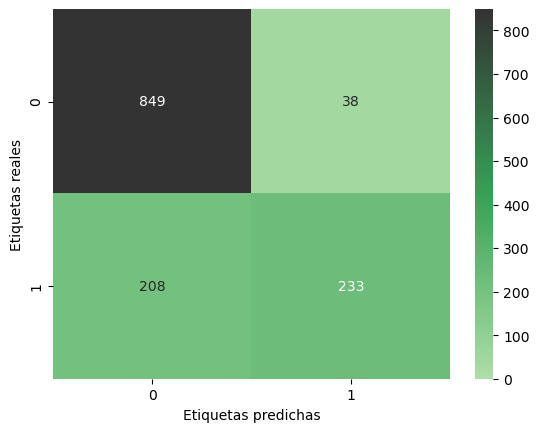

In [52]:
sns.heatmap(confusion_matrix(y_test_knn, y_pred_knn), annot=True, fmt='.0f', cmap=cmap, vmin=vmin)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [53]:
print(recall_score(y_test_knn, y_pred_knn).round(2))

0.53


In [54]:
y_pred_proba_knn = model.predict_proba(X_test_knn)

In [55]:
y_pred_proba_knn[5:9]

array([[0.81818182, 0.18181818],
       [1.        , 0.        ],
       [0.72727273, 0.27272727],
       [1.        , 0.        ]])

In [56]:
from sklearn.preprocessing import binarize
y_pred_knn_03 = binarize(y_pred_proba_knn, threshold=0.3)[:,1]
y_pred_knn_03 = (y_pred_proba_knn[:,1] > 0.3).astype(int)

In [57]:
confusion_knn_03 = confusion_matrix(y_test_knn,y_pred_knn_03)
print(confusion_knn_03)

[[770 117]
 [140 301]]


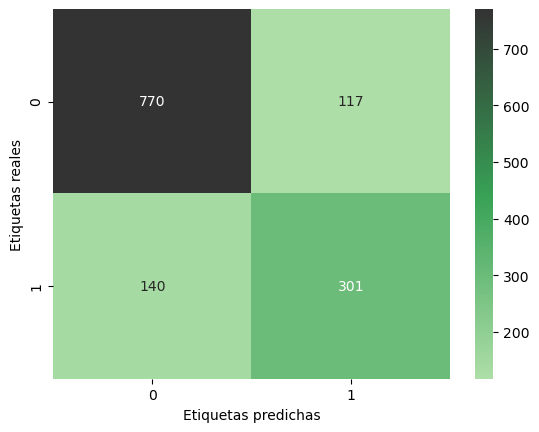

In [58]:
sns.heatmap(confusion_matrix(y_test_knn, y_pred_knn_03), annot=True, fmt='.0f', cmap=cmap)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [59]:
TP = confusion_knn_03[1, 1]; TN = confusion_knn_03[0, 0] ; FP = confusion_knn_03[0, 1] ; FN = confusion_knn_03[1, 0]
print('TP: ', TP,' TN: ', TN,' FP: ',FP,' FN: ',FN )

TP:  301  TN:  770  FP:  117  FN:  140


In [60]:
print('Accuracy =', (TP+TN) / (TP+TN+FP+FN))
print('Sensibilidad_knn_03=', (TP) / (TP + FN))

Accuracy = 0.8064759036144579
Sensibilidad_knn_03= 0.6825396825396826


In [61]:
print('Specificity_knn_03=', (TN)/ (TN+FP)) 
print('Total de casos negativos predichos correctamente (TN) =',(TN))
print('Total de casos negativos (TN+FP) =',(TN+FP))

Specificity_knn_03= 0.8680947012401353
Total de casos negativos predichos correctamente (TN) = 770
Total de casos negativos (TN+FP) = 887


In [62]:
from sklearn.metrics import roc_curve
fpr_log,tpr_log,thr_log = roc_curve(y_test_knn, y_pred_proba_knn[:,1])

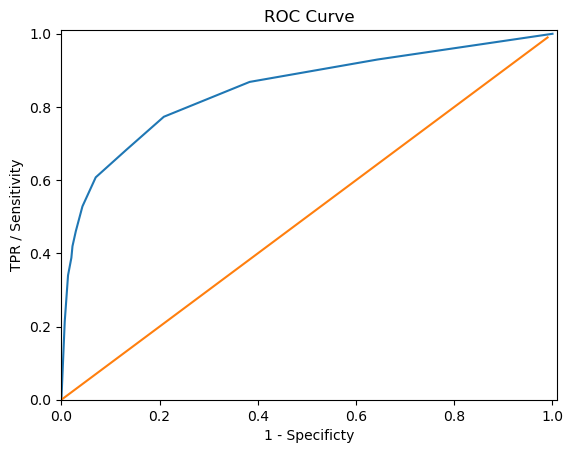

In [63]:
df = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [64]:
from sklearn.metrics import auc
print('AUC=', auc(fpr_log, tpr_log).round(2))

AUC= 0.85


In [65]:
print('Matriz Original')
display(confusion_matrix(y_test_knn,y_pred_knn))
print('')
print('Matriz con umbral 03')
display(confusion_matrix(y_test_knn,y_pred_knn_03))

Matriz Original


array([[849,  38],
       [208, 233]], dtype=int64)


Matriz con umbral 03


array([[770, 117],
       [140, 301]], dtype=int64)

In [66]:
print('Accuracy del modelo KNN con umbral 0.5 =', accuracy_score(y_test_knn, y_pred_knn).round(2))
print('Accuracy del modelo KNN con umbral 0.3 =', accuracy_score(y_test_knn, y_pred_knn_03).round(2))
print('Recall del modelo KNN con umbral 0.5=', recall_score(y_test_knn, y_pred_knn).round(2))
print('Recall del modelo KNN con umbral 0.3=', recall_score(y_test_knn, y_pred_knn_03).round(2))

Accuracy del modelo KNN con umbral 0.5 = 0.81
Accuracy del modelo KNN con umbral 0.3 = 0.81
Recall del modelo KNN con umbral 0.5= 0.53
Recall del modelo KNN con umbral 0.3= 0.68


Modelo LOGISTIC REGRESSION

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X, y, test_size = 0.30, random_state=42)
lg = LogisticRegression()
lg.fit(X_train_lg, y_train_lg)
y_pred_lg = lg.predict(X_test_lg)
print(accuracy_score(y_test_lg, y_pred_lg).round(2))

0.88


In [69]:
# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train_lg, model.predict(X_train_lg)).round(2)

0.84

In [70]:
conf_mat_lg = confusion_matrix(y_test_lg, y_pred_lg)
print('Confusion matrix\n\n', conf_mat_lg)

Confusion matrix

 [[829  58]
 [108 333]]


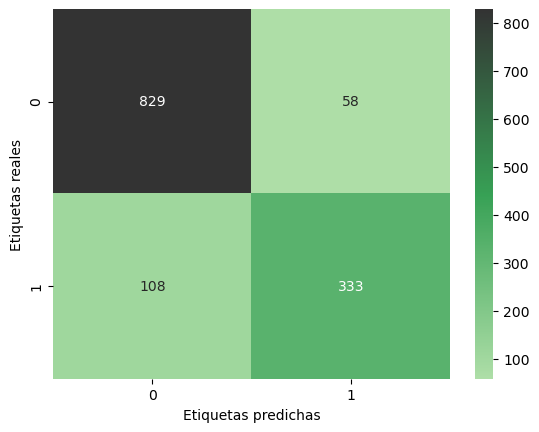

In [71]:
sns.heatmap(confusion_matrix(y_test_lg, y_pred_lg), annot=True, fmt='.0f', cmap = cmap)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [72]:
print(recall_score(y_test_lg, y_pred_lg).round(2))

0.76


In [73]:
y_pred_proba_lg = lg.predict_proba(X_test_lg)

In [74]:
y_pred_proba_lg[5:9]

array([[0.91509334, 0.08490666],
       [0.91401951, 0.08598049],
       [0.92989242, 0.07010758],
       [0.9756961 , 0.0243039 ]])

In [75]:
y_pred_lg_03 = binarize(y_pred_proba_lg, threshold=0.3)[:,1]
y_pred_lg_03 = (y_pred_proba_lg[:,1] > 0.3).astype(int)

In [76]:
print('Matrix Original')
display(confusion_matrix(y_test_lg,y_pred_lg))
print('')
print('Matrix con umbral 03')
display(confusion_matrix(y_test_lg,y_pred_lg_03))

Matrix Original


array([[829,  58],
       [108, 333]], dtype=int64)


Matrix con umbral 03


array([[766, 121],
       [ 68, 373]], dtype=int64)

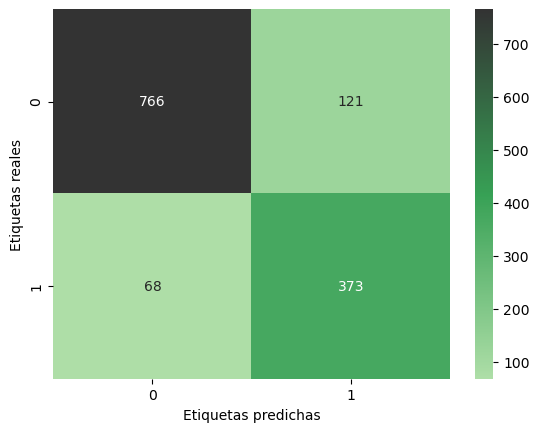

In [77]:
sns.heatmap(confusion_matrix(y_test_lg, y_pred_lg_03), annot=True, fmt='.0f', cmap= cmap)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [78]:
fpr_log,tpr_log,thr_log = roc_curve(y_test_lg, y_pred_proba_lg[:,1])

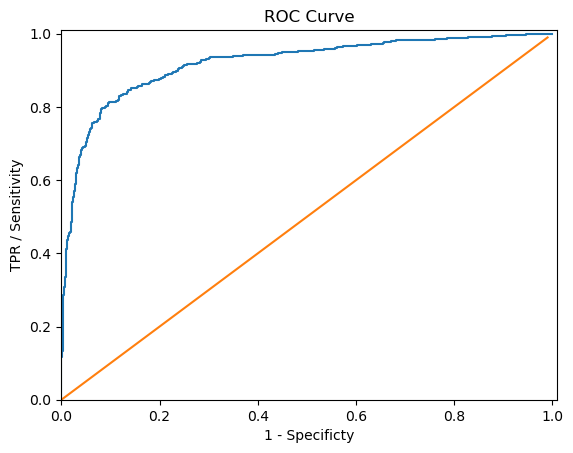

In [79]:
df = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [80]:
print('AUC=', auc(fpr_log, tpr_log).round(2))

AUC= 0.92


In [81]:
print('Accuracy del modelos LGR con umbral 0.5 =', accuracy_score(y_test_lg, y_pred_lg).round(2))
print('Accuracy del modelos LGR con umbral 0.3 =', accuracy_score(y_test_lg, y_pred_lg_03).round(2))
print('Recall del modelo LGR con umbral 0.5=', recall_score(y_test_lg, y_pred_lg).round(2))
print('Recall del modelo LGR con umbral 0.3=', recall_score(y_test_lg, y_pred_lg_03).round(2))

Accuracy del modelos LGR con umbral 0.5 = 0.88
Accuracy del modelos LGR con umbral 0.3 = 0.86
Recall del modelo LGR con umbral 0.5= 0.76
Recall del modelo LGR con umbral 0.3= 0.85
